In [199]:
%config IPCompleter.greedy=True

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets

# Exercise 9

## ISL 3.7 / exercise 13

Let's create `x` vector over normal distribution $N(0, 1)$ and `eps` vector over $N(0, 0.25)$ and then compute $Y = -1 + 0.5X + \epsilon$

In [201]:
x = np.random.normal(0, 1, 100)
eps = np.random.normal(0, 0.25, 100)

In [202]:
y = -1.0 + 0.5 * x + eps

$\beta_0 = -1$
$\beta_1 = 0.5$

Length of $y$ vector:

In [203]:
print(np.linalg.norm(y))

11.02803449477621


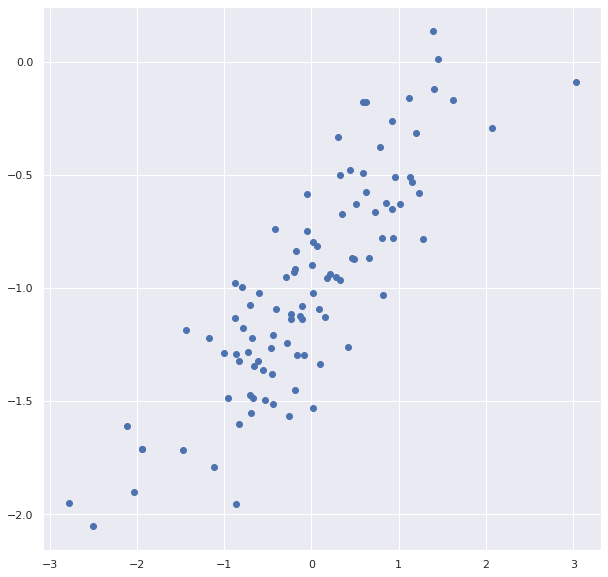

In [204]:
plt.figure(figsize=(10,10))
plt.scatter(x, y)

In [205]:
ls_model = smf.ols(formula='y ~ x', data=pd.DataFrame({ 'x': x, 'y': y })).fit()
print(ls_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     254.0
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           5.82e-29
Time:                        22:45:49   Log-Likelihood:                -4.1865
No. Observations:                 100   AIC:                             12.37
Df Residuals:                      98   BIC:                             17.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9721      0.026    -38.087      0.0

Predicted coefficients:

$\hat{\beta_0} = -0.9709$
$\hat{\beta_1} = 0.5344$

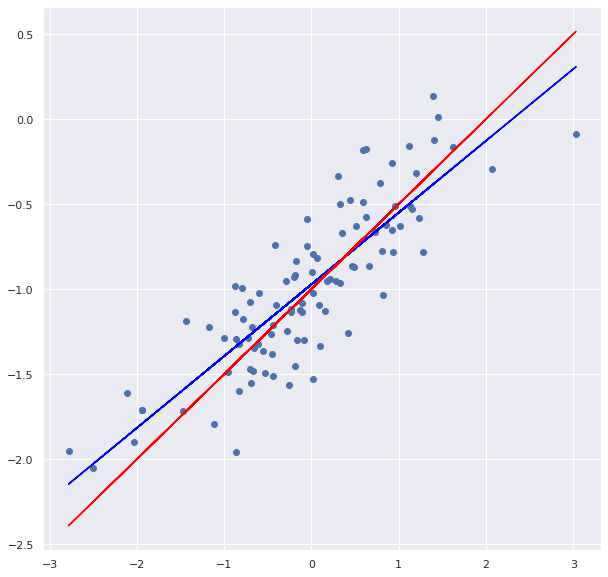

In [206]:
plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.plot(x, ls_model.predict(), color='blue')
plt.plot(x, -1.0 + 0.5*x, color='red') # TODO: add legend

In [207]:
poly_model = smf.ols(formula='y ~ x + np.square(x)', data=pd.DataFrame({ 'x': x, 'y': y })).fit()
print(poly_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     125.8
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           1.12e-27
Time:                        22:45:49   Log-Likelihood:                -4.1424
No. Observations:                 100   AIC:                             14.28
Df Residuals:                      97   BIC:                             22.10
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.9766      0.030    -32.710   

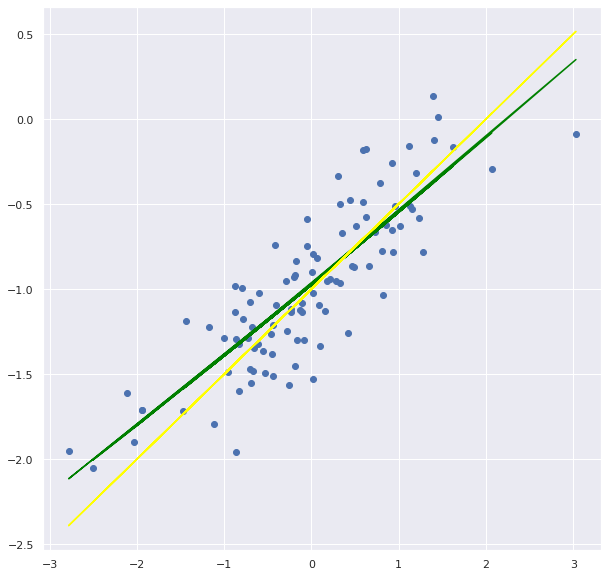

In [208]:
plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.plot(x, poly_model.predict(), color='green')
plt.plot(x, -1.0 + 0.5*x, color='yellow')

The same analysis as above but with _more_ noise in input data.

In [209]:
x = np.random.normal(0, 1, 100)
eps = np.random.normal(0, 0.05, 100)
y = -1 + 0.5*x + eps

In [210]:
ls_model = smf.ols(formula='y ~ x', data=pd.DataFrame({ 'x': x, 'y': y })).fit()
print(ls_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.196e+04
Date:                Sun, 15 Nov 2020   Prob (F-statistic):          3.14e-104
Time:                        22:45:49   Log-Likelihood:                 160.46
No. Observations:                 100   AIC:                            -316.9
Df Residuals:                      98   BIC:                            -311.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0011      0.005   -203.774      0.0

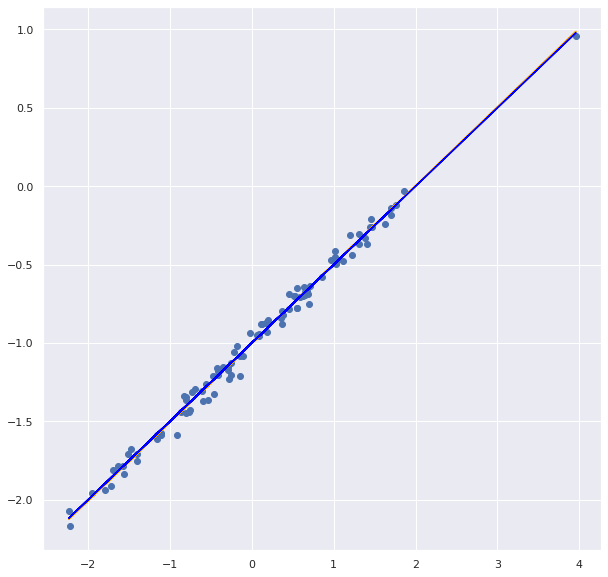

In [211]:
plt.figure(figsize=(10, 10))
plt.scatter(x, y)
plt.plot(x, ls_model.predict(), color='orange')
plt.plot(x, -1.0 + 0.5*x, color='blue')

The same analysis as above but with _less_ noise in input data.

In [212]:
x = np.random.normal(0, 1, 100)
eps = np.random.normal(0, 0.5, 100)
y = -1 + 0.5*x + eps

In [213]:
ls_model = smf.ols('y ~ x', data=pd.DataFrame({ 'x': x, 'y': y })).fit()
print(ls_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     119.5
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           1.16e-18
Time:                        22:45:50   Log-Likelihood:                -64.444
No. Observations:                 100   AIC:                             132.9
Df Residuals:                      98   BIC:                             138.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9466      0.047    -20.322      0.0

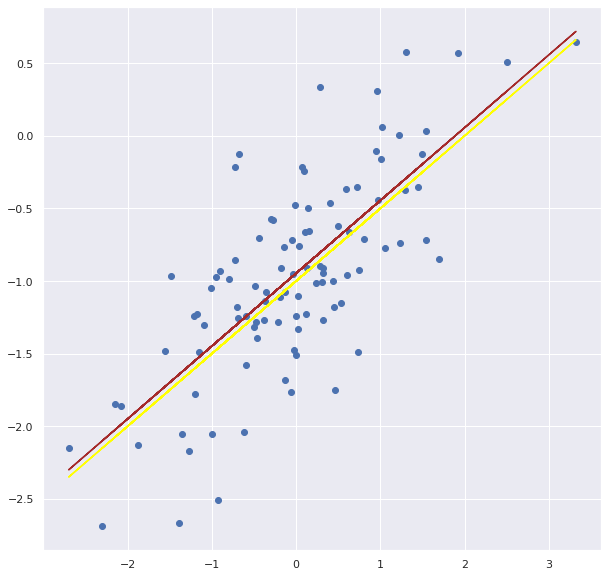

In [214]:
plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.plot(x, ls_model.predict(), color='brown')
plt.plot(x, -1.0 + 0.5*x, color='yellow')

## ISL 3.7 / exercise 14

In [215]:
np.random.seed(1)
x_1 = np.random.uniform(size=100)
x_2 = 0.5 * x_1 + np.random.randn(100) / 10
y = 2 + 2 * x_1 + 0.3 * x_2 + np.random.randn(100)

Linear model: $\hat{y} = \hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_2}x_2 + \hat{\epsilon}$

$\hat{\beta_0} = 2$,
$\hat{\beta_1} = 2$,
$\hat{\beta_2} = 0.3$

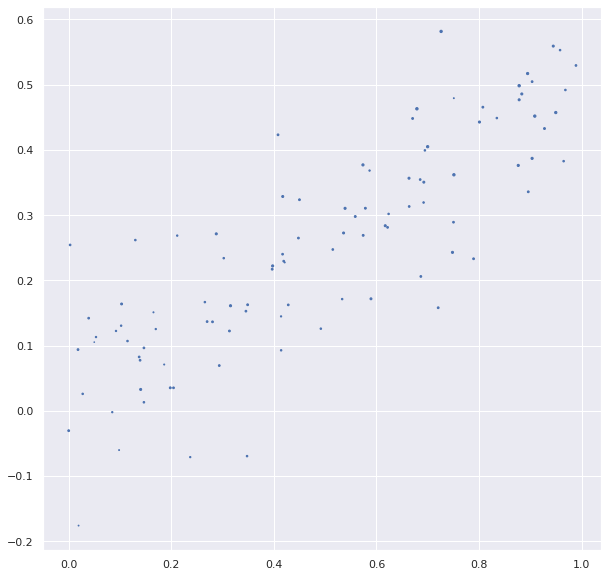

In [216]:
plt.figure(figsize=(10,10))
plt.scatter(x=x_1, y=x_2, s=y)

In [217]:
df = pd.DataFrame({ 'x_1': x_1, 'x_2': x_2, 'y': y })

In [218]:
ls_model = smf.ols(formula='y ~ x_1 + x_2', data=df).fit()
print(ls_model.summary()) # TODO: add plot

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           4.40e-07
Time:                        22:45:50   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1893      0.199     11.021      0.0

In [219]:
ls_model = smf.ols(formula='y ~ x_1', data=df).fit()
print(ls_model.summary()) # TODO: add plot

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           6.68e-07
Time:                        22:45:50   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2486      0.201     11.209      0.0

In [220]:
ls_model = smf.ols(formula='y ~ x_2', data=df).fit()
print(ls_model.summary()) # TODO: add plot

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           1.09e-07
Time:                        22:45:50   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2655      0.187     12.145      0.0

In [221]:
df = df.append({ 'x_1': 0.1, 'x_2': 0.8, 'y': 6}, ignore_index=True)

In [225]:
model_c = smf.ols(formula='y ~ x_1 + x_2', data=df).fit()
model_d = smf.ols(formula='y ~ x_1', data=df).fit()
model_e = smf.ols(formula='y ~ x_2', data=df).fit()

In [226]:
print(model_c.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     19.92
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           5.51e-08
Time:                        22:46:46   Log-Likelihood:                -144.15
No. Observations:                 101   AIC:                             294.3
Df Residuals:                      98   BIC:                             302.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1996      0.199     11.041      0.0

In [227]:
print(model_d.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     21.89
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           9.15e-06
Time:                        22:46:54   Log-Likelihood:                -151.28
No. Observations:                 101   AIC:                             306.6
Df Residuals:                      99   BIC:                             311.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3583      0.208     11.331      0.0

In [228]:
print(model_e.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     39.99
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           7.41e-09
Time:                        22:46:58   Log-Likelihood:                -144.24
No. Observations:                 101   AIC:                             292.5
Df Residuals:                      99   BIC:                             297.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2331      0.182     12.271      0.0

In [ ]:
# TODO: add plots